Ashley Brown 801055033 10/9/2022

Homework 2

"In this homework, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)"

In [1]:
#imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
import seaborn as sns

Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

In [2]:
#configure data sets
data_set = '/content/drive/MyDrive/IntroToMachineLearning/diabetes.csv'
df = pd.read_csv(data_set)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#indep variables:
  #Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values #first 8 categories

#dep variables:
  #Outcome (last category)
Y = df.iloc[:, 8].values

In [4]:
#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [5]:
#perform logistic regression (can use built in functions)
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

In [6]:
#prediction function
yPred = classifier.predict(xTest)
yPred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [7]:
#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)
cmatrix

array([[91, 11],
       [22, 30]])

In [8]:
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 

accuracy = 0.7857142857142857
precision = 0.7317073170731707
recall =  0.5769230769230769


These are the results of the training.

Text(0.5, 257.44, 'predicted')

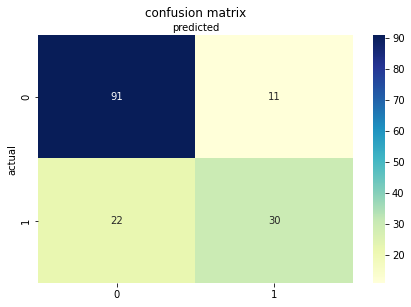

In [9]:
#generate heatmap plot of confusion matrix
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('confusion matrix', y=1) 
plt.ylabel('actual') 
plt.xlabel('predicted') 

This is the confusion matrix representing the binary classifier.

\===================================================================================

Problem 2 (20 points)

Repeat problem 1, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 1.
\===================================================================================

In [10]:
#indep variables:
X = df.iloc[:, [0,1,2,3,4,5,6,7]].values
#dep variables:
Y = df.iloc[:, 8].values

In [11]:
#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

Time to split into kfolds.

In [12]:
#5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 77.600% (2.777%)


In [13]:
#10 kfolds
kfoldB = KFold(n_splits=10, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldB)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 77.604% (5.036%)


Problem 1 accuracy was 74.67 percent, for comparison. kfolds increased the accuracy by a noticeable amount.

\===================================================================================
Problem 3 (30pts):
\===================================================================================

1. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your results, including accuracy, precision, and recall. At the end, plot the confusion matrix representing your binary classifier. 

In [14]:
#load dataset
breast = load_breast_cancer() 
breast_data = breast.data 
breast_input = pd.DataFrame(breast_data)

X = breast_data
Y = breast.target

In [15]:
#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [16]:
#perform logistic regression (can use built in functions)
classifier = LogisticRegression(random_state = 0)
classifier.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

In [17]:
#prediction function
yPred = classifier.predict(xTest)
yPred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1])

In [18]:
#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)
cmatrix

array([[46,  2],
       [ 0, 66]])

In [19]:
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 

accuracy = 0.9824561403508771
precision = 0.9705882352941176
recall =  1.0


These are the results of the training.

Text(0.5, 257.44, 'predicted')

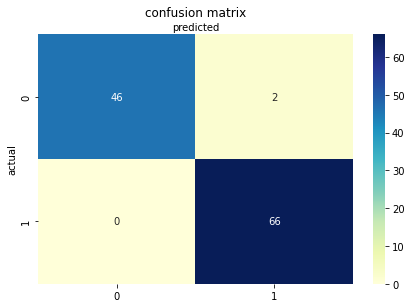

In [20]:
#generate heatmap plot of confusion matrix
class_names=[0,1]
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('confusion matrix', y=1) 
plt.ylabel('actual') 
plt.xlabel('predicted') 

This is the confusion matrix representing the binary classifier.

2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the results.

In [21]:
#redo but with weights
X = breast_data
Y = breast.target

#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [22]:
#perform logistic regression but with weight penalty
classifier = LogisticRegression(random_state = 0, penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)

#prediction function
yPred = classifier.predict(xTest)
yPred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1])

In [23]:
#get confusion matrix values
cmatrix = confusion_matrix(yTest, yPred)
cmatrix

array([[42,  2],
       [ 2, 68]])

In [24]:
print("accuracy =",metrics.accuracy_score(yTest, yPred)) 
print("precision =",metrics.precision_score(yTest, yPred)) 
print("recall = ",metrics.recall_score(yTest, yPred)) 

accuracy = 0.9649122807017544
precision = 0.9714285714285714
recall =  0.9714285714285714


Every single metric here has improved slightly as a result of the new training with weight.

\===================================================================================
Problem 4 (30pts):
\===================================================================================

1. Repeat problem 3, and this time use K-fold cross-validation for your training and validation. Perform the training two times for K=5 and K=10. Analyze and compare your average accuracy against problem 3. 

In [25]:
X = breast_data
Y = breast.target

#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [26]:
#5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 97.193% (1.701%)


In [27]:
#10 kfolds
kfoldB = KFold(n_splits=10, random_state=0, shuffle=True)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldB)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 97.895% (2.046%)


These both are an improvement over the original accuracy of 0.9649

2. How about adding weight penalty here, considering the number of parameters. Add the weight penalty and repeat the training and report the average accuracy.

In [28]:
#redo but with weights
X = breast_data
Y = breast.target

#standardize data before splitting
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split dataset
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [29]:
#5 kfolds
kfoldA = KFold(n_splits=5, random_state=0, shuffle=True)
classifier = LogisticRegression(penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldA)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 97.016% (1.423%)


In [30]:
#10 kfolds
kfoldB = KFold(n_splits=10, random_state=0, shuffle=True)
classifier = LogisticRegression(penalty="l2", solver="newton-cg", class_weight='balanced')
classifier.fit(xTrain, yTrain)
results = cross_val_score(classifier, X, Y, cv=kfoldB)
#print mean and std across all folds to get accuracy
print("accuracy = %.3f%% (%.3f%%)"  % (results.mean()*100.0, results.std()*100.0))

accuracy = 97.190% (1.952%)


Strangely, the accuracy is slightly decreased when weights are considered. Potentially due to different solver.